# 작업형 2유형
- 제2유형 작업은 데이터분석을 수행하고 그결과를 도출하는 것이다.  
- 분석 데이터셋을 탐색하고, 데이터를 학습하여 분석 모델을 만들고 성능을 평가한다. 
- 학습유형에 따라 지도학습, 비지도학습 등으로 구분되며, 각 유형에 따라 다양한 분석모델을 활용하느 작업에 익숙해져야 한다. 


#### 빅데이터 분석 과정
- 필요 패키지 임포트 -> 데이터 불러오기 -> 데이터 살펴보기  
데이터 전처리 -> 분석 데이터 셋 준비 -> 데이터 분석 수행 -> 성능평가 및 시각화

In [1]:
# 필요 패키지 임포트
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# 데이터 살펴보기
df              # 데이터프레임 전체 살펴보기
df.shape        # 데이터프레임 열과 행의 수를 출력
df.info()       # 데이터프레임 요약정보 출력
df.describe()   # 데이터프레임 기술통계 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# 데이터 전처리
## 텍스트로 되어 있는 species 컬럼의 데이터를 0, 1, 2로 변환한다.
df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2,}, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# 분석 데이터셋 준비 
## X는 독립변수(설명변수), y는 종속변수(목표변수)
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [7]:
# 데이터분석 수행
## DecisionTreeClassifier 객체 생성
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)    # 학습 수행

DecisionTreeClassifier(random_state=11)

In [8]:
## 학습이 완료된 dt객체에서 테스트 데이터셋으로 예측 수행
pred = dt.predict(X_test)

In [10]:
# 성능평가 및 시각화
## 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [11]:
## 모델 성능 - 오차행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]])

In [12]:
## 모델 성능 평가 - 평가지표 계산
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# 지도학습 - 분류

## 1. 의사결정나무를 이용한 분류 문제 해결

In [14]:
import numpy as np
import pandas as pd
import sklearn

# 의사결정나무 분류모델을 위한 패키지 임포트
from sklearn.tree import DecisionTreeClassifier

# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 공개되어 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.info()       # 데이터프레임 결츨값 유무 확인
df.describe()   # 데이터프레임의 기술 통계 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 데이터 전처리
## Age 칼럼의 결측값을 평균으로 대치한다.
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace=True)

# Embarked 컬럼의 결측값을 최빈값으로 대치한다.
d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode, inplace=True)

# Sex 칼럼의 값을 1과 0으로 레이블인코딩 한다.
from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

# Embarked 컬럼의 값을 레이블이코딩 한다.
from sklearn.preprocessing import LabelEncoder
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

In [18]:
# SibSp, Parch의 값을 더해서 FamilySize 컬럼(파생변수)을 생성한다.
df["FamilySize"] = df["SibSp"]+df["Parch"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,0


In [19]:
# 분석 데이터셋 준비
## X는 독립변수(설명변수), y는 종속변수(목표변수)
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"]]
y = df["Survived"]
X

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,22.000000,7.2500,2,1
1,1,0,38.000000,71.2833,0,1
2,3,0,26.000000,7.9250,2,0
3,1,0,35.000000,53.1000,2,1
4,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,2,0
887,1,0,19.000000,30.0000,2,0
888,3,0,29.699118,23.4500,2,3
889,1,1,26.000000,30.0000,0,0


In [20]:
# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [21]:
# DecisionTreeClassifier 객체 생성
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)    # 학습 수행

DecisionTreeClassifier(random_state=11)

In [22]:
# 학습이 완료된 dt객체에서 테스트 데이터셋으로 예측 수행
pred = dt.predict(X_test)

In [24]:
# 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.7877094972067039


## 2. KNN을 이용한 분류 문제 해결

In [26]:
import numpy as np
import pandas as pd
import sklearn

# KNN 분류모델을 위한 패키지 임포트
from sklearn.neighbors import KNeighborsClassifier
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# 각 독립변수별 Min-Max 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["sepal_length"]] = scaler.fit_transform(df[["sepal_length"]])
df[["sepal_width"]] = scaler.fit_transform(df[["sepal_width"]])
df[["petal_length"]] = scaler.fit_transform(df[["petal_length"]])
df[["petal_width"]] = scaler.fit_transform(df[["petal_width"]])

# 분석 데이터셋 준비
# X는 독립변수(설명변수), y는 종속벼수(목표변수)
X = df[["sepal_length","sepal_width","petal_length", "petal_width"]]
y = df["species"]

# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# KNeighborsClassifier 객체 생성
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 학습이 완료된 dt객체에서 테스트 데이터셋으로 예측 수행
pred = knn.predict(X_test)

# 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(acc)

0.9333333333333333


/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 3. SVM을 이용한 분류 문제 해결

In [29]:
import numpy as np
import pandas as pd
import sklearn

# 서포트벡터머신 분류모델을 위한 패키지 임포트
from sklearn import svm
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 웹에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Age 칼럼의 결측값을 평균으로 대치한다.
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace=True)

# Embarked 컬럼의 결측값을 최빈값으로 대치한다.
d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode, inplace=True)

# SibSp, Parch의 값을 더해서 FamilySize 칼럼(파생변수)를 생성한다.
df["FamilySize"] = df["SibSp"]+df["Parch"]

# Sex 칼럼의 값을 1과 0으로 원-핫 인코딩 한다.
onehot_sex = pd.get_dummies(df["Sex"])
df = pd.concat([df, onehot_sex], axis=1)

# Embarked 칼럼의 값을 원-핫 인코딩 한다.
onehot_embarked = pd.get_dummies(df["Embarked"])
df = pd.concat([df, onehot_embarked], axis=1)

# 분석 데이터셋 준비
# X는 독립변수(설명변수), y는 종속변수(목표변수)
X = df[["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S"]]
y = df["Survived"]

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# SVM 객체 생성 - 커널 rdf 적용
sv = svm.SVC(kernel='rbf')

sv.fit(X_train, y_train)

# 학습이 완료된 dt 객체에서 테스트 데이터셋으로 예측 수행
pred = sv.predict(X_test)

# 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

# 모델 성능 평가 - Confusion Matrix 계산
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
print(mat)

# 모델 성능 평가 - 평가지표 계산
from sklearn.metrics import classification_report 
rpt = classification_report(y_test, pred)
print(rpt)

0.7238805970149254
[[167   7]
 [ 67  27]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268



#### SVM 커널 파라미터 조정

In [30]:
#1 커널 파라미터- rbf 적용
sv = svm.SVC(kernel='rbf')

#2 커널 파라미터- linear 적용, C=1, gamma=0.1
sv = svm.SVC(kernel='linear', C=1, gamma=0.1)

#3 커널 파라미터- rbf 적용, C=0.1, gamma=0.1
sv = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)


## 4.로지스틱 회귀를 이용한 분류 문제 해결

In [34]:
import numpy as np
import pandas as pd
import sklearn

# 로지스틱 회귀 분류모델을 위한 패키지 임포트
from sklearn.linear_model import LogisticRegression
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# 각 독립변수별 Min-Max 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["sepal_length"]] = scaler.fit_transform(df[["sepal_length"]])
df[["sepal_width"]] = scaler.fit_transform(df[["sepal_width"]])
df[["petal_length"]] = scaler.fit_transform(df[["petal_length"]])
df[["petal_width"]] = scaler.fit_transform(df[["petal_width"]])

# 분석 데이터셋 준비
# X는 독립변수(설명변수), y는 종속변수(목표변수)
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]

# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# LogisticRegression 객체 생성
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 학습이 완료된 d객체에서 테스트 데이터셋으로 예측 수행
pred = lr.predict(X_test)

# 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.8333333333333334


## 5.랜덤 포레스트를 이용한 분류 문제 해결

In [39]:
import numpy as np
import pandas as pd
import sklearn

# 랜덤 포레스트 분류모델을 위한 패키지 임포트
from sklearn.ensemble import RandomForestClassifier
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 웹에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Age 칼럼의 결측값을 평균으로 대치한다.
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace=True)

# Embarked 칼럼의 결과값을 최빈값으로 대치한다.
d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode, inplace=True)

# Sex 칼럼의 값을 1과 0으로 레이블인코딩 한다.
from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Embarked"])

# Embarked 칼럼의 값을 레이블인코딩 한다.
from sklearn.preprocessing import LabelEncoder
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

# SibSp, Parch의 값을 더해서 FamilySize 칼럼(파생변수)을 생성한다.
df["FamilySize"] = df["SibSp"]+df["Parch"]

# 분석 데이터셋 준비
# X는 독립변수(설명변수), y는 종속변수(목표변수)
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"]]
y = df["Survived"]

# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# RandomForestClassifier 객체 생성
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rf.fit(X_train, y_train)

# 학습이 완료된 rf객체에서 테스트 데이터셋으로 예측 수행
pred = rf.predict(X_test)

# 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)


0.7541899441340782


# 지도학습 - 회귀(예측)

## 1. 단순 선형 회귀분석을 이용한 예측 문제 해결

In [40]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# 선형회귀모델을 위한 패키지 임포트
from sklearn.linear_model import LinearRegression
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


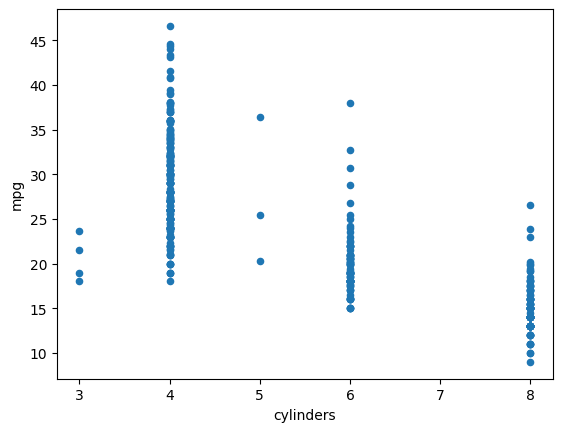

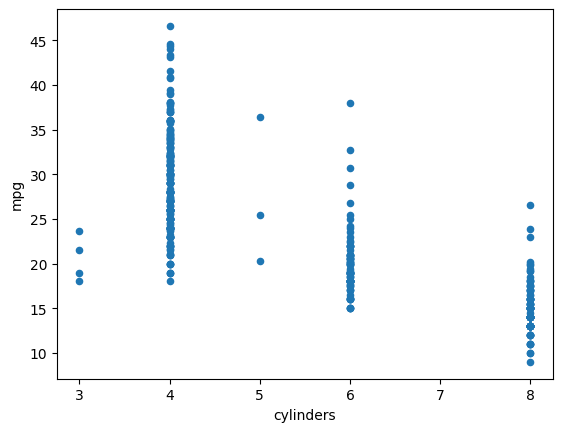

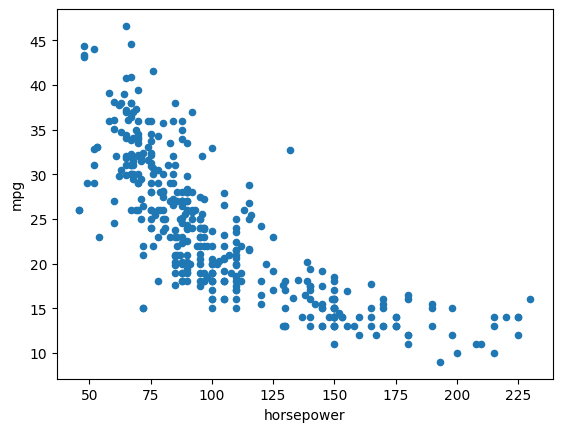

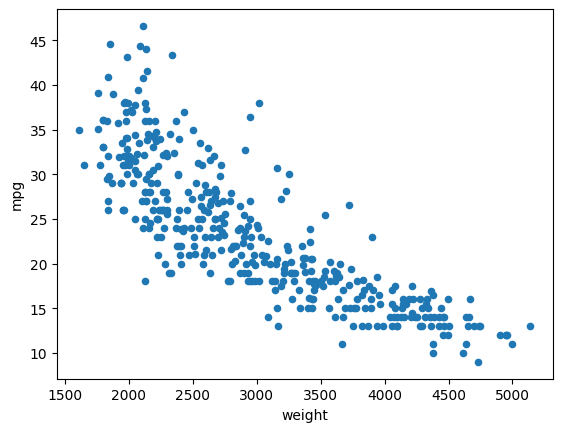

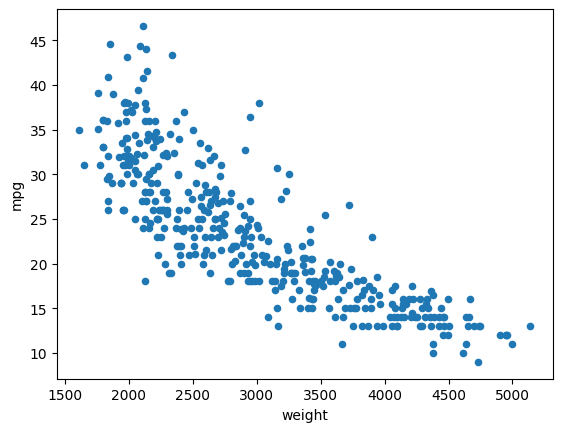

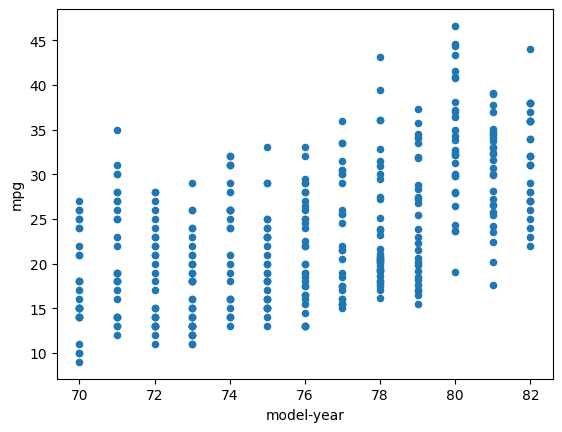

In [44]:
# 종속변수 mpg와 다른 변수들 간의 상관관계 분석
df.plot(kind='scatter', x='cylinders', y='mpg')
plt.show()

df.plot(kind='scatter', x='cylinders', y='mpg')
plt.show()

df.plot(kind='scatter', x='horsepower', y='mpg')
plt.show()

df.plot(kind='scatter', x='weight', y='mpg')
plt.show()

df.plot(kind='scatter', x='weight', y='mpg')
plt.show()

df.plot(kind='scatter', x='model-year', y='mpg')
plt.show()

In [45]:
# 데이터 전처리
## 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

In [46]:
# 분석 데이터셋 준비 : weight-mpg 분석
X = df[["weight"]]      # 독립변수(설명변수)
y = df["mpg"]           # 종속변수(목표변수)

In [48]:
# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 1)
(80, 1)
(316,)
(80,)


In [49]:
# 데이터 분석 수행
## LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
# 회귀식의 완료된 lr객체에서 테스트 데이터셋으로 예측 수행
pred = lr.predict(X_test)

In [51]:
# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.7015633872576374


In [52]:
# 학습이 완료된 lr 객체에 학습 데이터셋으로 예측 수행
pred = lr.predict(X_train)

# 모델 성능 평가 - 학습 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_train, pred)
print(score)

0.6875735975346925


#### 추가작업
- 동일한 방법으로 horsepower와 mpg의 관계에 대해 선형 회귀분석 수행

In [54]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

# 선형 회귀 모델을 위한 패키지 임포트
from sklearn.linear_model import LinearRegression
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# 분석 데이터셋 준비 : horsepower-mpg 분석
X = df[["horsepower"]]      # 독립변수(설명변수)
y = df["mpg"]               # 종속변수(목표변수)

# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

# 회귀식의 기울기와 y절편 출력
print("기울기 a: ", lr.coef_)
print("y절편 b: ", lr.intercept_)

# 학습이 완료된 모형에 테스트 데이터를 적용 예측값 생성
pred = lr.predict(X_test)

# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

기울기 a:  [-0.16035108]
y절편 b:  40.313418327064824
0.6039842414538835


In [55]:
# 상관관계 분석 
## 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775680     -0.804711   -0.777575 -0.832725   
cylinders    -0.775680   1.000000      0.950706    0.843751  0.896058   
displacement -0.804711   0.950706      1.000000    0.897787  0.932729   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.832725   0.896058      0.932729    0.864350  1.000000   
acceleration  0.421159  -0.504844     -0.542713   -0.687241 -0.415462   
model-year    0.581144  -0.352554     -0.374620   -0.420697 -0.311774   

              acceleration  model-year  
mpg               0.421159    0.581144  
cylinders        -0.504844   -0.352554  
displacement     -0.542713   -0.374620  
horsepower       -0.687241   -0.420697  
weight           -0.415462   -0.311774  
acceleration      1.000000    0.294588  
model-year        0.294588    1.000000  


## 2. 다중 선형 회구분석을 이용한 예측 문제 해결

In [60]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# 선형 회귀 모델을 위한 패키지 임포트
from sklearn.linear_model import LinearRegression
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

# 데이터프레임 정보 및 결측값 유무 확인
df.info()

# 데이터 전처리
# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis=1)

# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

# 분석 데이터셋 준비
# median_house_value를 제외한 나머지를 독립변수로 함
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

# 회귀식의 기울기와 y절편 출력
print("기울기 :", lr.coef_)
print("y절편 :", lr.intercept_)

# 학습이 안료된 lr객체에서 테스트 데이터셋으로 예측 수행
pred = lr.predict(X_test)

# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.

## 3. 의사결정나무를 이용한 예측 문제 해결

In [64]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

# 의사결정나무 모델을 위한 패키지 임포트
from sklearn.tree import DecisionTreeRegressor
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다. 
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

# 데이터프레임 정보 및 결측값 유무 확인
df.info()

# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis=1)

# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

# 분석 데이터셋 준비
# median_house_value를 제외한 나머지를 독립변수로 함
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# DecisionTreeRegressor 객체 생성
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(X_train, y_train)

# 학습이 완료된 dtr객체에서 테스트 데이터셋으로 예측 수행
pred = dtr.predict(X_test)

# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

# 학습이 완료된 dtr객체에서 학습 데이터셋으로 예측 수행
pred = dtr.predict(X_train)

# 모델 성능 평가 - 학습 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred)
print(mse)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.

## 4. 랜덤 포레스트를 이용한 예측문제 해결

In [66]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# 랜덤 포레스트 모델을 위한 패키지 임포트
from sklearn.ensemble import RandomForestRegressor
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

# 데이터프레임 정보 및 결측값 유무 확인
df.info()

# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis=1)

# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

# 분석 데이터셋 준비
# median_house_value를 제외한 나머지르 독립변수로 함
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# RandomForestRegressor 객체 생성
rfr = RandomForestRegressor(max_depth=3, random_state=42)
rfr.fit(X_train, y_train)

# 학습이 완료된 rfr 객체에서 테스트 데이터셋으로 예측 수행
pred = rfr.predict(X_test)

# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

# 학습이 완료된 rfr 객체에서 테스트 데이터셋으로 예측 수행
pred = rfr.predict(X_test)

# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

# 학습이 완료된 rfr 객체에서 학습 데이터세으로 예측 수행
pred = rfr.predict(X_train)

# 모델 성능 평가 - 학습 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred)
print(mse)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.

# 비지도학습

## 1. 군집분석을 이용한 문제 해결 (K-menas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


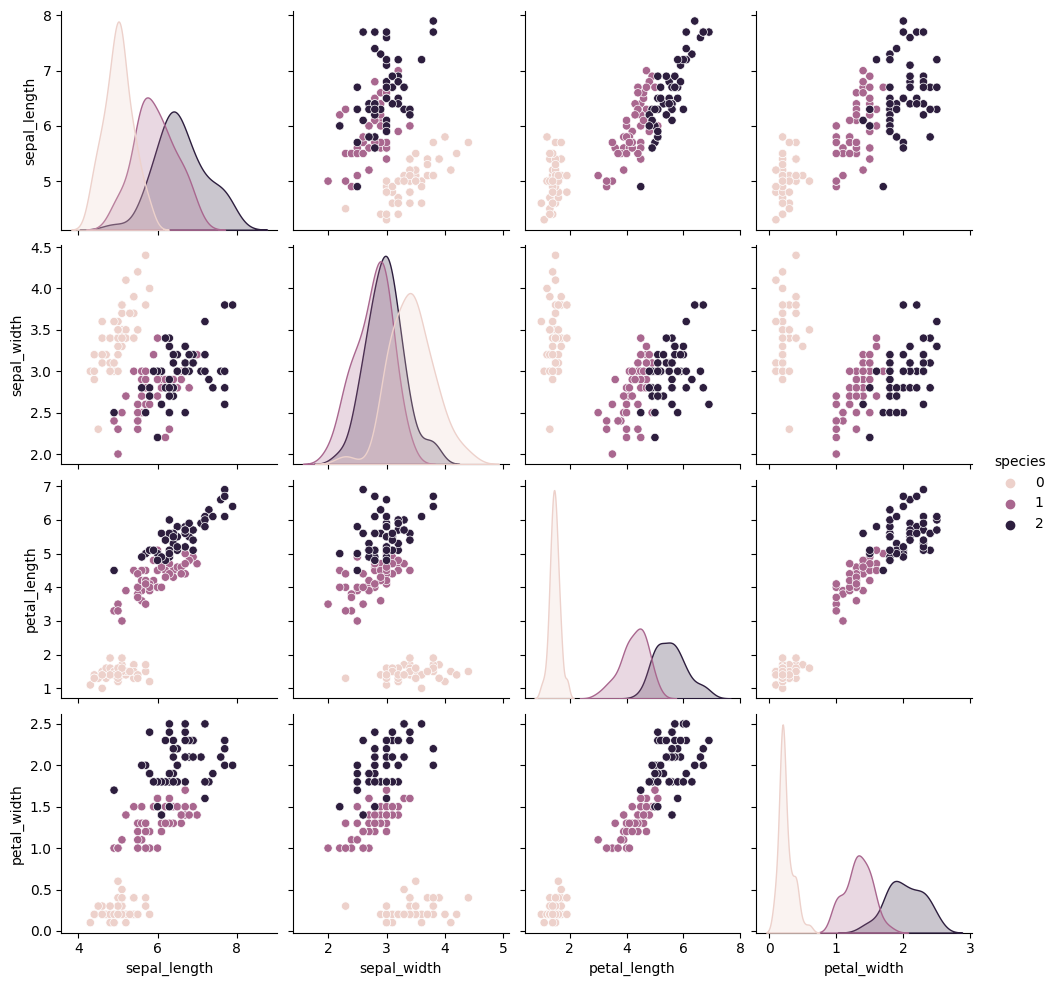

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


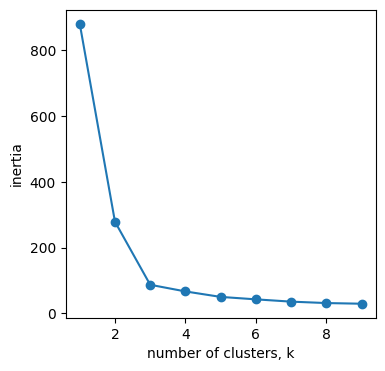

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

df.info()

# species 칼럼의 값을 0,1,2로 레이블이코딩 한다.
from sklearn.preprocessing import LabelEncoder
df["species"] = LabelEncoder().fit_transform(df["species"])
df.head()

df_copy = df

# 변수간 상관관계 시각화
import seaborn as sns
from matplotlib import pyplot as plt        # 그래프 시각화
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(df, hue="species")             # 데이터특징들간의 상관관계 표현
plt.show()

# KMeans 객체 생성
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42, algorithm='auto')

# 생성모델로 데이터 학습
cluster1.fit(df)
KMeans(max_iter=500, n_clusters=3, random_state=42)

# 결과 값을 변수에 저장
cluster_center = cluster1.cluster_centers_
cluster_pridiction = cluster1.predict(df)
print(pd.DataFrame(cluster_center))
print(cluster_pridiction)

# 기존 데이터에 예측된 군집 결과를 붙인다.
df_copy["cluster"] = cluster_pridiction
df_copy

# 적절한 K에 대해 붓꽃 데이터프레임을 넣어 K와 inertia를 비교
# 값(3)이 적합한 변화시점임을 알 수 있음
scope = range(1,10)
inertias = []

for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

# K 개수와 inertia 비교 시각화
plt.figure(figsize=(4, 4))

plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

## 2. 연관분석을 이용한 문제 해결

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# apriori, association_rules 모듈 호출
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv("./csv/retail_dataset.csv", sep=',')

df.info()

# 장바구니 데이터 고유항목 구분 출력
items = set()
for col in df:
    items.update(df[col].unique())

# 장바구니 목록 값(텍스트)을 수치로 표현-각 항목당 매칭될 경우 1로, 아니면 0으로 표시(one-hot encoding)
itemset = set(items)
encoding = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    dismatching = list(itemset - rowset)
    matching = list(itemset.intersection(rowset))
    for i in dismatching:
        labels[i] = 0
    for j in matching:
        labels[j] = 1
    encoding.append(labels)
encoding[0]
result = pd.DataFrame(encoding)

# 첫째 NaN 열항목 삭제
result = result.drop(result.columns[0], axis=1)

# apriori 함수 적용
freq_items = apriori(result, min_support=0.2, use_colnames=True)

# association_rules로 규칙 도출(신뢰도 임계치 0.6 기반)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
